In [42]:
# Citation: (source of help: googling in general, stackoverflow, and chatgpt)

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
file_path1 = '/content/drive/My Drive/Colab Notebooks/Asgmt3/world_bank_development_indicators.csv'
file_path2 = '/content/drive/My Drive/Colab Notebooks/Asgmt3/merged_population_data.csv'

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.impute import KNNImputer
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the World Bank Development Indicators dataset
world_bank_data = pd.read_csv(file_path1)

In [46]:
# Dataset first 5 row
world_bank_data.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


In [47]:
#Inspect the dataset

print("Dataset Information:")
world_bank_data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    17272 non-null  object 
 1   date                                       17272 non-null  object 
 2   agricultural_land%                         14714 non-null  float64
 3   forest_land%                               8176 non-null   float64
 4   land_area                                  14930 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9195 non-null   float64
 7   control_of_corruption_estimate             4783 non-null   float64
 8   control_of_corruption_std                  4783 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  r

In [48]:
# Display summary statistics of the numerical features
print("\nSummary Statistics:")
world_bank_data.describe()


Summary Statistics:


,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,14714.000000,8176.000000,1.493000e+04,10086.000000,9195.000000,4783.000000,4783.000000,7348.000000,8076.000000,7790.000000,...,455.000000,2108.000000,16037.000000,16019.000000,15866.000000,1.666500e+04,1.653900e+04,4850.000000,4850.000000,4209.000000
mean,36.945264,32.408397,5.078664e+06,1214.021416,20.998956,-0.024874,0.203572,80.758176,31.029558,2885.204630,...,27.058386,37.797249,28.203391,10.490354,64.254193,2.159737e+08,1.231026e+08,-0.021062,0.167144,8.035708
std,20.552401,23.355506,1.406167e+07,810.573031,23.260442,1.000047,0.087529,28.745226,29.858553,4103.108667,...,11.262910,8.835216,12.862546,5.358976,11.112156,7.102653e+08,4.087475e+08,0.998757,0.064188,12.026623
min,0.262821,0.000000,2.027000e+00,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,...,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.102437,0.000000
25%,20.454545,12.430556,2.164000e+04,591.000000,8.678157,-0.791694,0.147978,68.435427,5.065460,375.934172,...,18.300000,31.200000,16.438000,6.976522,56.810602,9.940000e+05,4.295845e+05,-0.850328,0.126422,1.348194
50%,37.470745,30.765419,2.419300e+05,1110.000000,13.456865,-0.253887,0.172218,98.290939,20.989980,1331.112025,...,24.800000,35.700000,27.065000,9.200000,66.776719,6.787419e+06,3.148533e+06,0.020768,0.142207,3.428468
75%,50.737179,47.118947,1.444290e+06,1782.000000,24.705827,0.666176,0.227055,100.000000,53.904220,3893.175308,...,33.300000,43.200000,39.752000,12.441818,72.568000,4.641603e+07,2.035198e+07,0.884255,0.196929,9.402278
max,93.440750,98.574551,1.299507e+08,3240.000000,327.166162,2.459118,0.942502,100.000000,98.340000,54799.174708,...,74.200000,65.800000,58.121000,103.534000,85.497561,7.950947e+09,3.435260e+09,1.800992,0.578548,138.773986


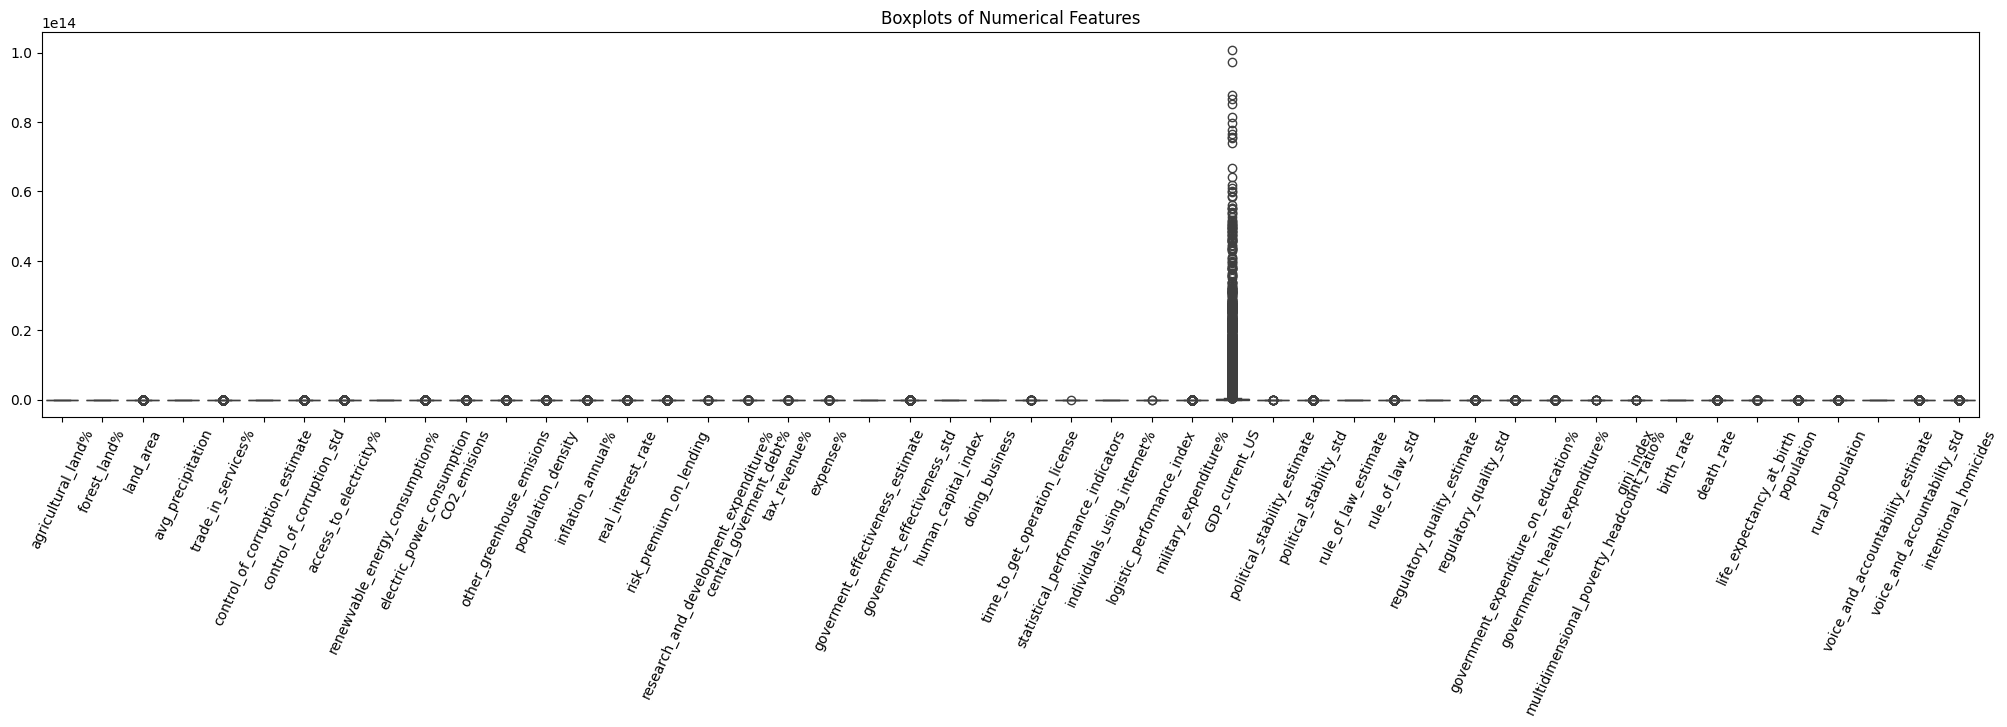

In [49]:
# Plot boxplots for each numerical feature
plt.figure(figsize=(25, 5))
sn.boxplot(data=world_bank_data.select_dtypes(include='number'))
plt.xticks(rotation=65)
plt.title("Boxplots of Numerical Features")
plt.show()

We can see that the dataset is highly unbalanced

The dataset has a lot of missing values, with some columns having more than 70% missing values (e.g., 'time_to_get_operation_license' with only 371 non-null values out of 17272).
In the next step, I will be dropping columns with Significant Missing Data

In [50]:
# Drop columns with more than 50% missing values
threshold = 0.5
world_bank_data_cleaned = world_bank_data.loc[:, world_bank_data.isnull().mean() < threshold]

# Print columns after dropping
print("Columns remaining after dropping those with >50% missing values:")
print(world_bank_data_cleaned.columns)


Columns remaining after dropping those with >50% missing values:
Index(['country', 'date', 'agricultural_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%', 'population_density',
       'inflation_annual%', 'military_expenditure%', 'GDP_current_US',
       'birth_rate', 'death_rate', 'life_expectancy_at_birth', 'population',
       'rural_population'],
      dtype='object')


In [51]:
print("\nMissing Values After Imputation:")
print(world_bank_data_cleaned.isnull().sum())


Missing Values After Imputation:
country                        0
date                           0
agricultural_land%          2558
land_area                   2342
avg_precipitation           7186
trade_in_services%          8077
population_density          2371
inflation_annual%           6484
military_expenditure%       7150
GDP_current_US              4074
birth_rate                  1235
death_rate                  1253
life_expectancy_at_birth    1406
population                   607
rural_population             733
dtype: int64


In [52]:
# Separate numerical and categorical features from the dataset
numerical_features = world_bank_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_features = world_bank_data_cleaned.select_dtypes(include=['object']).columns

# Print the names of numerical and categorical features
print("Numerical Features:")
print(numerical_features)
print()
print("Categorical Features:")
print(categorical_features)

Numerical Features:
Index(['agricultural_land%', 'land_area', 'avg_precipitation',
       'trade_in_services%', 'population_density', 'inflation_annual%',
       'military_expenditure%', 'GDP_current_US', 'birth_rate', 'death_rate',
       'life_expectancy_at_birth', 'population', 'rural_population'],
      dtype='object')

Categorical Features:
Index(['country', 'date'], dtype='object')


In [53]:
# Standardize the numerical feature of the cleaned dataset (world_bank_data_cleaned)
numerical_data = world_bank_data_cleaned[numerical_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [54]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Fit and transform the standardize set (scaled_data)
imputed_data = imputer.fit_transform(scaled_data)


# Convert the imputed array back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numerical_data.columns)

# Reverse the scaling
reversed_scaled_data = scaler.inverse_transform(imputed_df)
imputed_original_scale = pd.DataFrame(reversed_scaled_data, columns=numerical_data.columns)


# Concatenate imputed numeric data and original categorical data
final_data = pd.concat([imputed_original_scale, world_bank_data_cleaned[categorical_features.tolist()]], axis=1)
# final_data = pd.concat([imputed_original_scale, categorical_features], axis=1)


print("\nMissing Values After Imputation:")
print(final_data.isnull().sum())



Missing Values After Imputation:
agricultural_land%          0
land_area                   0
avg_precipitation           0
trade_in_services%          0
population_density          0
inflation_annual%           0
military_expenditure%       0
GDP_current_US              0
birth_rate                  0
death_rate                  0
life_expectancy_at_birth    0
population                  0
rural_population            0
country                     0
date                        0
dtype: int64


In [55]:
# Here I'm basicaly doing the same thing to check against my KNN Imputation

# Fill missing values in numerical columns with the mean
numerical_cols = world_bank_data_cleaned.select_dtypes(include=['float64']).columns

for col in numerical_cols:
    # world_bank_data_cleaned[col].fillna(world_bank_data_cleaned[col].mean())
    # world_bank_data_cleaned[col] = world_bank_data_cleaned[col].fillna(world_bank_data_cleaned[col].mean())
    world_bank_data_cleaned.loc[:, col] = world_bank_data_cleaned[col].fillna(world_bank_data_cleaned[col].mean())

# Recheck the status of missing values
print("\nMissing Values After Imputation:")
print(world_bank_data_cleaned.isnull().sum())


Missing Values After Imputation:
country                     0
date                        0
agricultural_land%          0
land_area                   0
avg_precipitation           0
trade_in_services%          0
population_density          0
inflation_annual%           0
military_expenditure%       0
GDP_current_US              0
birth_rate                  0
death_rate                  0
life_expectancy_at_birth    0
population                  0
rural_population            0
dtype: int64


Got the same result. However, the KNN approach took longer to run.

In [56]:
# Checking the non missing dataset header.
world_bank_data_cleaned.head()

,country,date,agricultural_land%,land_area,avg_precipitation,trade_in_services%,population_density,inflation_annual%,military_expenditure%,GDP_current_US,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population
0,Afghanistan,1960-01-01,36.945264,5.078664e+06,1214.021416,20.998956,293.641600,20.044991,2.775668,5.377778e+08,50.340,31.921,32.535,8622466.0,7898093.0
1,Afghanistan,1961-01-01,57.878356,6.522300e+05,327.000000,20.998956,13.477056,20.044991,2.775668,5.488889e+08,50.443,31.349,33.068,8790140.0,8026804.0
2,Afghanistan,1962-01-01,57.955016,6.522300e+05,327.000000,20.998956,13.751356,20.044991,2.775668,5.466667e+08,50.570,30.845,33.547,8969047.0,8163985.0
3,Afghanistan,1963-01-01,58.031676,6.522300e+05,327.000000,20.998956,14.040239,20.044991,2.775668,7.511112e+08,50.703,30.359,34.016,9157465.0,8308019.0
4,Afghanistan,1964-01-01,58.116002,6.522300e+05,327.000000,20.998956,14.343888,20.044991,2.775668,8.000000e+08,50.831,29.867,34.494,9355514.0,8458694.0


In [57]:
# Display new summary statistics of the numerical features
print("\nSummary Statistics:")
world_bank_data_cleaned.describe()


Summary Statistics:


,agricultural_land%,land_area,avg_precipitation,trade_in_services%,population_density,inflation_annual%,military_expenditure%,GDP_current_US,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population
count,17272.000000,1.727200e+04,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,1.727200e+04,17272.000000,17272.000000,17272.000000,1.727200e+04,1.727200e+04
mean,36.945264,5.078664e+06,1214.021416,20.998956,293.641600,20.044991,2.775668,1.223794e+12,28.203391,10.490354,64.254193,2.159737e+08,1.231026e+08
std,18.969437,1.307355e+07,619.400226,16.971158,1391.229226,230.202030,2.209617,4.767093e+12,12.394135,5.160921,10.650246,6.976723e+08,3.999796e+08
min,0.262821,2.027000e+00,18.100000,0.621025,0.098625,-17.640424,0.000017,8.824744e+06,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00
25%,24.041463,2.812000e+04,867.000000,12.640850,23.737179,3.792767,1.825358,4.510402e+09,17.190038,7.115500,57.964000,1.160426e+06,4.752855e+05
50%,36.945264,3.868500e+05,1214.021416,20.998956,74.001083,11.385172,2.775668,7.740196e+10,28.203391,9.553078,65.195737,7.549429e+06,3.529862e+06
75%,47.141348,5.078664e+06,1274.000000,20.998956,274.772534,20.044991,2.775668,1.223794e+12,38.814250,12.006212,72.083348,6.289842e+07,3.321246e+07
max,93.440750,1.299507e+08,3240.000000,327.166162,21594.800000,23773.131774,117.349823,1.008796e+14,58.121000,103.534000,85.497561,7.950947e+09,3.435260e+09


## At this point, there is no missing value. However, the summary statistics show that the dataset is highly skewed and imbalanced:.

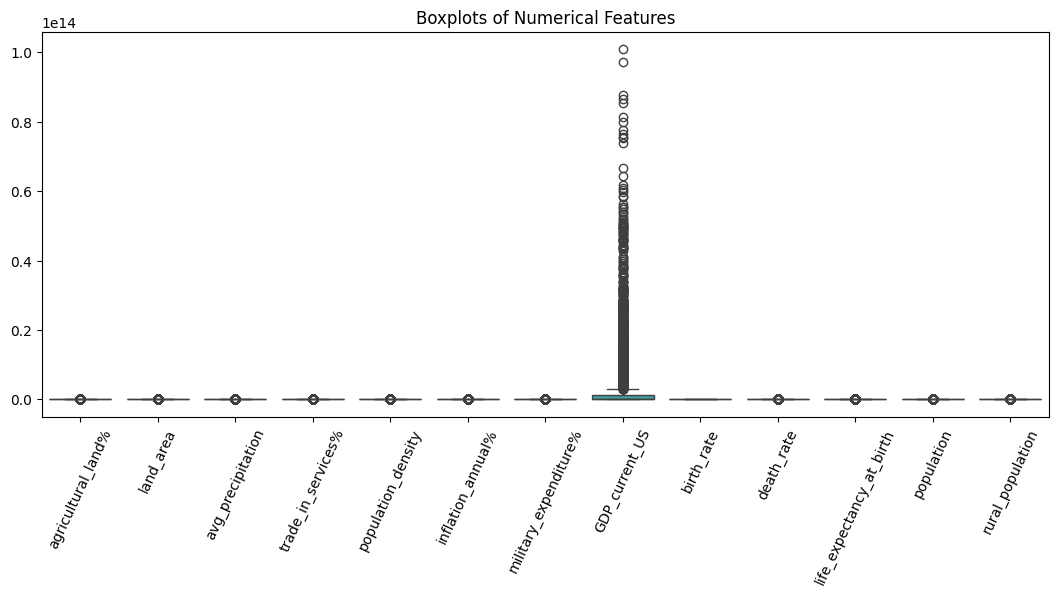

In [58]:
# Plot of the non missing value dataset (world_bank_data_cleaned).
plt.figure(figsize=(13, 5))
sn.boxplot(data=world_bank_data_cleaned.select_dtypes(include='number'))
plt.xticks(rotation=65)
plt.title("Boxplots of Numerical Features")
plt.show()

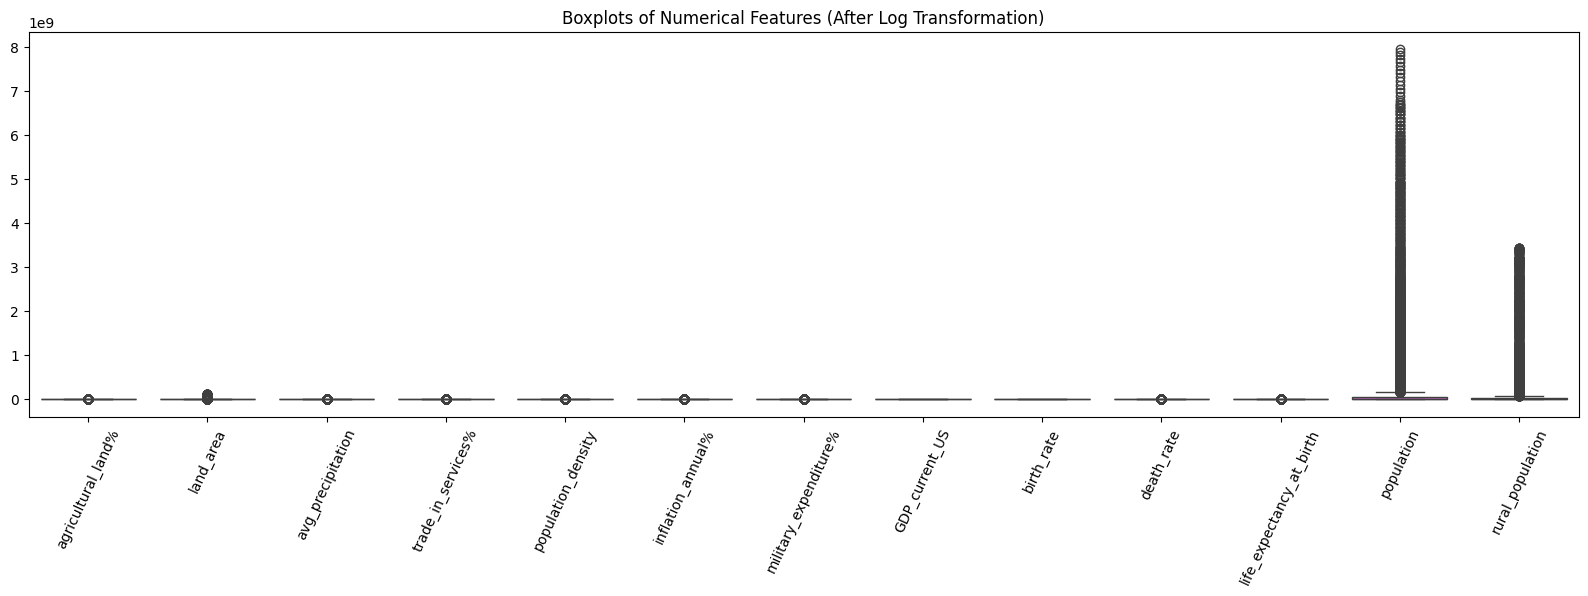

In [59]:
# Apply log transformation to GDP_current_US to reduce skewness
Dataset_transformed = world_bank_data_cleaned.copy(deep=True)

skewed_features = ['GDP_current_US']

for feature in skewed_features:
    Dataset_transformed.loc[:, feature] = np.log1p(Dataset_transformed[feature])

# Plot again to see the effect of log transformation
plt.figure(figsize=(20, 5))
sn.boxplot(data=Dataset_transformed.select_dtypes(include='number'))
plt.xticks(rotation=65)
plt.title("Boxplots of Numerical Features (After Log Transformation)")
plt.show()


## Two new skewed features; let's apply the same approach by adding them to the list of skewed features.

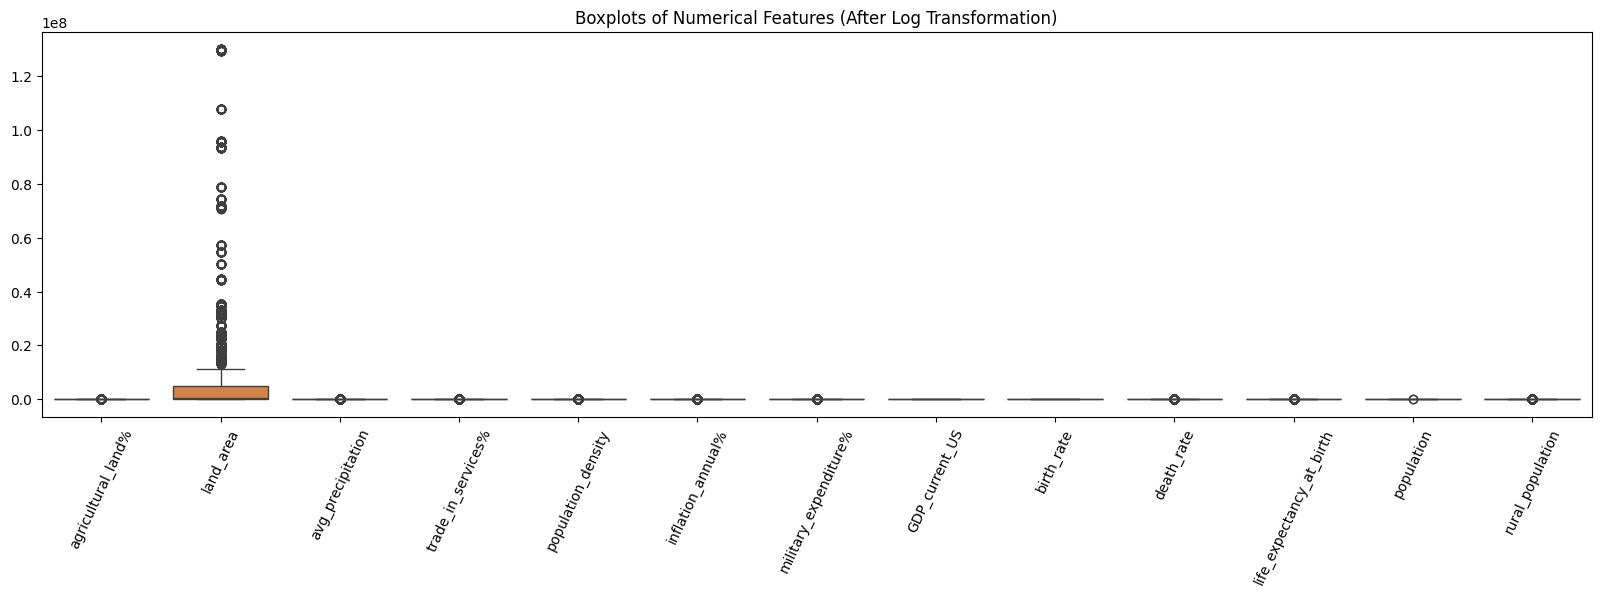

In [60]:

# Apply log transformation to 'GDP_current_US', 'population', 'rural_population' to reduce skewness
Dataset_transformed = world_bank_data_cleaned.copy(deep=True)

skewed_features = ['GDP_current_US', 'population', 'rural_population']

for feature in skewed_features:
    Dataset_transformed.loc[:, feature] = np.log1p(Dataset_transformed[feature])

# Plot again to see the effect of log transformation
plt.figure(figsize=(20, 5))
sn.boxplot(data=Dataset_transformed.select_dtypes(include='number'))
plt.xticks(rotation=65)
plt.title("Boxplots of Numerical Features (After Log Transformation)")
plt.show()



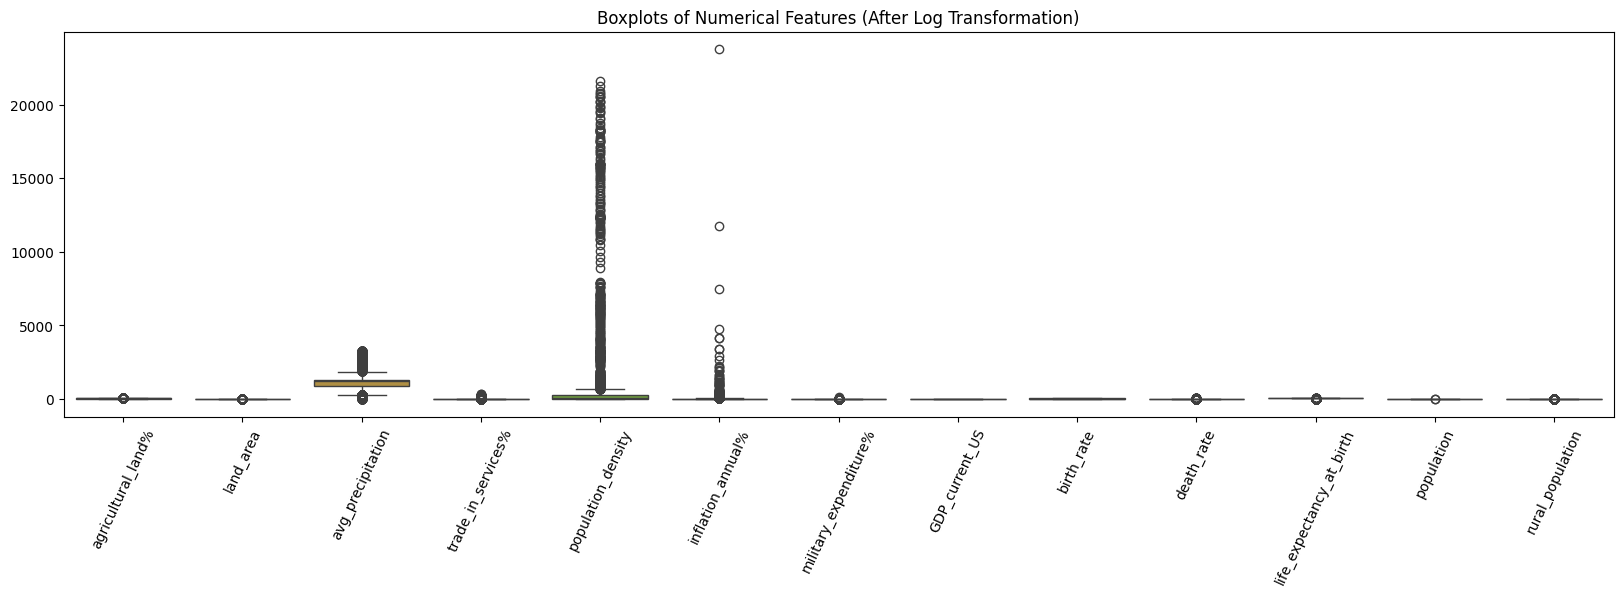

In [61]:
# Apply log transformation to reduce skewness: add 'land_area' to the list
Dataset_transformed = world_bank_data_cleaned.copy(deep=True)

# selectect skewed features
skewed_features = ['GDP_current_US', 'population', 'rural_population', 'land_area']

for feature in skewed_features:
    Dataset_transformed.loc[:, feature] = np.log1p(Dataset_transformed[feature])

# Plot again to see the effect of log transformation
plt.figure(figsize=(20, 5))
sn.boxplot(data=Dataset_transformed.select_dtypes(include='number'))
plt.xticks(rotation=65)
plt.title("Boxplots of Numerical Features (After Log Transformation)")
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


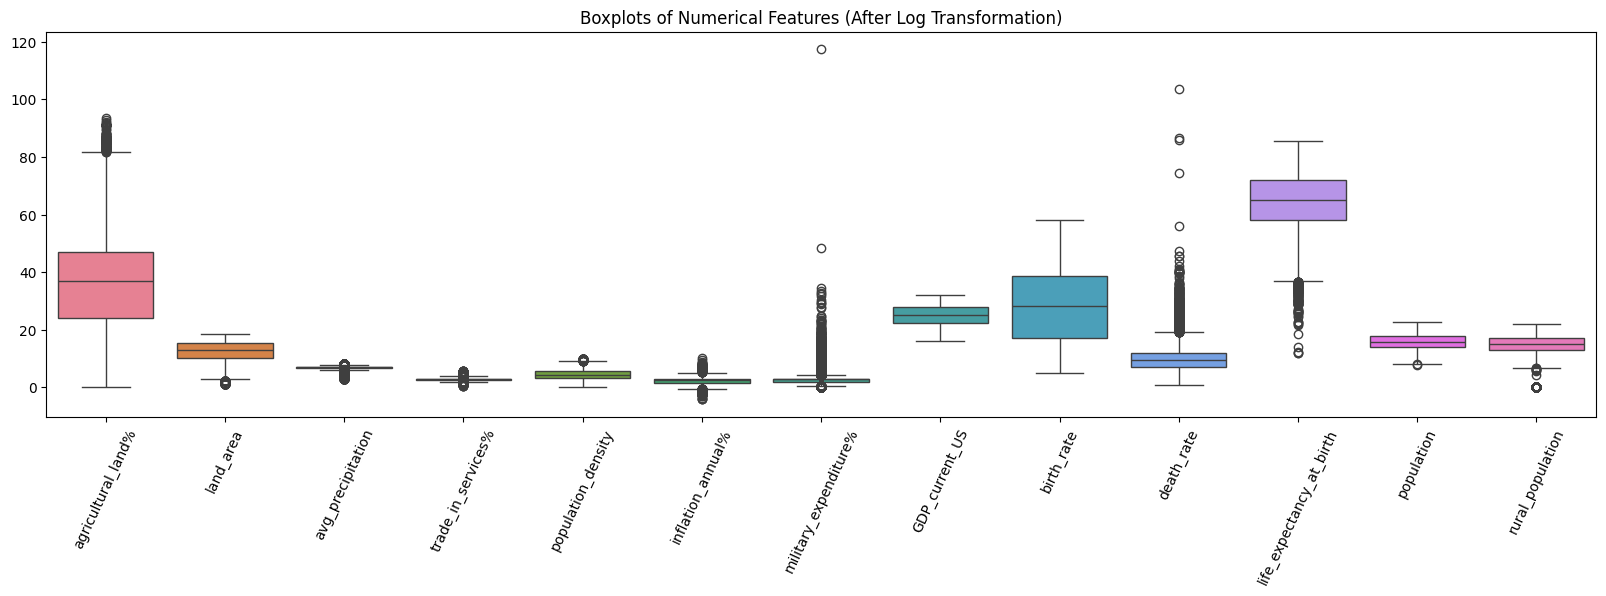

In [62]:
# Apply log transformation to reduce skewness: add 'population_density', 'inflation_annual%', 'avg_precipitation', 'trade_in_services%' to the list

Dataset_transformed = world_bank_data_cleaned.copy(deep=True)

skewed_features = ['GDP_current_US', 'population', 'rural_population', 'land_area', 'population_density', 'inflation_annual%', 'avg_precipitation', 'trade_in_services%']

for feature in skewed_features:
    Dataset_transformed.loc[:, feature] = np.log1p(Dataset_transformed[feature])

# Plot again to see the effect of log transformation
plt.figure(figsize=(20, 5))
sn.boxplot(data=Dataset_transformed.select_dtypes(include='number'))
plt.xticks(rotation=65)
plt.title("Boxplots of Numerical Features (After Log Transformation)")
plt.show()

The boxplot up until now has given me more skewness each time I add the given skewed feature from the previous plot to the array variable (skewed_features) for the log transformation to reduce the overall skewness.

This last boxplot is more acceptable. So, I will conduct my analysis from here.

In [63]:
Dataset_transformed.head()

,country,date,agricultural_land%,land_area,avg_precipitation,trade_in_services%,population_density,inflation_annual%,military_expenditure%,GDP_current_US,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population
0,Afghanistan,1960-01-01,36.945264,15.440559,7.102517,3.090995,5.685760,3.046663,2.775668,20.102956,50.340,31.921,32.535,15.969882,15.882132
1,Afghanistan,1961-01-01,57.878356,13.388154,5.793014,3.090995,2.672565,3.046663,2.775668,20.123407,50.443,31.349,33.068,15.989141,15.898297
2,Afghanistan,1962-01-01,57.955016,13.388154,5.793014,3.090995,2.691335,3.046663,2.775668,20.119350,50.570,30.845,33.547,16.009290,15.915243
3,Afghanistan,1963-01-01,58.031676,13.388154,5.793014,3.090995,2.710729,3.046663,2.775668,20.437064,50.703,30.359,34.016,16.030080,15.932732
4,Afghanistan,1964-01-01,58.116002,13.388154,5.793014,3.090995,2.730717,3.046663,2.775668,20.500122,50.831,29.867,34.494,16.051477,15.950705


## Here I am Introducing a new dataset to merge with My current: (Dataset_transformed)

In [64]:
# Population dataset from the merged_population_data.csv (file_path2)
population_dataset = pd.read_csv(file_path2)
population_dataset.head()

,Country Code,Region,IncomeGroup,Country Name,2020,2021,2022,2023
0,ABW,Latin America & Caribbean,High income,Aruba,106585.0,106537.0,106445.0,106277.0
1,AFE,Unknown,Unknown,Africa Eastern and Southern,685112979.0,702977106.0,720859132.0,739108306.0
2,AFG,South Asia,Low income,Afghanistan,38972230.0,40099462.0,41128771.0,42239854.0
3,AFW,Unknown,Unknown,Africa Western and Central,466189102.0,478185907.0,490330870.0,502789511.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,33428486.0,34503774.0,35588987.0,36684202.0


In [65]:
# Changing Country Name to 'country' for a match in both dataset before the merging.
population_dataset.rename(columns={'Country Name': 'country'}, inplace=True)
population_dataset.head()

,Country Code,Region,IncomeGroup,country,2020,2021,2022,2023
0,ABW,Latin America & Caribbean,High income,Aruba,106585.0,106537.0,106445.0,106277.0
1,AFE,Unknown,Unknown,Africa Eastern and Southern,685112979.0,702977106.0,720859132.0,739108306.0
2,AFG,South Asia,Low income,Afghanistan,38972230.0,40099462.0,41128771.0,42239854.0
3,AFW,Unknown,Unknown,Africa Western and Central,466189102.0,478185907.0,490330870.0,502789511.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,33428486.0,34503774.0,35588987.0,36684202.0


In [66]:
# Convert key column to string for the merge
Dataset_transformed['country'] = Dataset_transformed['country'].astype(str)
population_dataset['country'] = population_dataset['country'].astype(str)

# Merging the two dataset
merged_World_population = pd.merge(Dataset_transformed, population_dataset, on='country', how='inner')

# Inspect the merged dataset
print("Merged Dataset:")
merged_World_population.head()



Merged Dataset:


,country,date,agricultural_land%,land_area,avg_precipitation,trade_in_services%,population_density,inflation_annual%,military_expenditure%,GDP_current_US,...,life_expectancy_at_birth,population,rural_population,Country Code,Region,IncomeGroup,2020,2021,2022,2023
0,Afghanistan,1960-01-01,36.945264,15.440559,7.102517,3.090995,5.685760,3.046663,2.775668,20.102956,...,32.535,15.969882,15.882132,AFG,South Asia,Low income,38972230.0,40099462.0,41128771.0,42239854.0
1,Afghanistan,1961-01-01,57.878356,13.388154,5.793014,3.090995,2.672565,3.046663,2.775668,20.123407,...,33.068,15.989141,15.898297,AFG,South Asia,Low income,38972230.0,40099462.0,41128771.0,42239854.0
2,Afghanistan,1962-01-01,57.955016,13.388154,5.793014,3.090995,2.691335,3.046663,2.775668,20.119350,...,33.547,16.009290,15.915243,AFG,South Asia,Low income,38972230.0,40099462.0,41128771.0,42239854.0
3,Afghanistan,1963-01-01,58.031676,13.388154,5.793014,3.090995,2.710729,3.046663,2.775668,20.437064,...,34.016,16.030080,15.932732,AFG,South Asia,Low income,38972230.0,40099462.0,41128771.0,42239854.0
4,Afghanistan,1964-01-01,58.116002,13.388154,5.793014,3.090995,2.730717,3.046663,2.775668,20.500122,...,34.494,16.051477,15.950705,AFG,South Asia,Low income,38972230.0,40099462.0,41128771.0,42239854.0


In [67]:
print("\nMissing Values per Column:")
print(merged_World_population.isnull().sum())  # Check for missing values inthe new dataset


Missing Values per Column:
country                       0
date                          0
agricultural_land%            0
land_area                     0
avg_precipitation             0
trade_in_services%            0
population_density            0
inflation_annual%           247
military_expenditure%         0
GDP_current_US                0
birth_rate                    0
death_rate                    0
life_expectancy_at_birth      0
population                    0
rural_population              0
Country Code                  0
Region                        0
IncomeGroup                   0
2020                          0
2021                          0
2022                          0
2023                          0
dtype: int64


In [68]:
# Drop rows with missing values
merged_World_population.dropna(inplace=True)
print(merged_World_population.isnull().sum())  # Check for missing values

country                     0
date                        0
agricultural_land%          0
land_area                   0
avg_precipitation           0
trade_in_services%          0
population_density          0
inflation_annual%           0
military_expenditure%       0
GDP_current_US              0
birth_rate                  0
death_rate                  0
life_expectancy_at_birth    0
population                  0
rural_population            0
Country Code                0
Region                      0
IncomeGroup                 0
2020                        0
2021                        0
2022                        0
2023                        0
dtype: int64


In [69]:
print("\nSummary Statistics:")
merged_World_population.describe()


Summary Statistics:


,agricultural_land%,land_area,avg_precipitation,trade_in_services%,population_density,inflation_annual%,military_expenditure%,GDP_current_US,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,2020,2021,2022,2023
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,1.671300e+04,1.671300e+04,1.671300e+04,1.671300e+04
mean,37.013258,12.320756,6.911904,2.921572,4.241944,2.293301,2.770053,24.795374,28.134438,10.471218,64.307015,15.799368,14.713055,3.216833e+08,3.249742e+08,3.279551e+08,3.313472e+08
std,19.107205,3.594886,0.750281,0.558473,1.500502,1.012353,2.221856,3.172826,12.455701,5.181530,10.698315,3.087565,4.042813,9.921878e+08,1.001285e+09,1.009228e+09,1.018266e+09
min,0.262821,1.107572,2.949688,0.483059,0.094059,-4.110660,0.000017,15.993070,5.000000,0.795000,11.995000,7.881182,0.000000,1.106900e+04,1.120400e+04,1.131200e+04,1.139600e+04
25%,23.840786,10.241780,6.766192,2.593624,3.194401,1.594767,1.802493,22.228003,17.000000,7.100000,57.873000,13.888412,13.033637,1.790133e+06,1.786038e+06,1.768086e+06,1.756374e+06
50%,36.945264,12.808055,7.102517,3.090995,4.280117,2.507211,2.775668,25.015655,28.203391,9.463000,65.596000,15.797615,15.033395,1.060623e+07,1.050577e+07,1.048694e+07,1.059380e+07
75%,47.360743,15.440559,7.150701,3.090995,5.520567,3.046663,2.775668,27.832977,38.895000,12.043000,72.173000,17.842398,17.099934,6.708123e+07,6.702629e+07,6.779100e+07,6.817023e+07
max,93.440750,18.682666,8.083637,5.793520,9.949407,10.076353,117.349823,32.244948,58.121000,103.534000,85.497561,22.796557,21.957359,7.821272e+09,7.888964e+09,7.951595e+09,8.024997e+09


In [70]:
merged_World_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16959
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   16713 non-null  object 
 1   date                      16713 non-null  object 
 2   agricultural_land%        16713 non-null  float64
 3   land_area                 16713 non-null  float64
 4   avg_precipitation         16713 non-null  float64
 5   trade_in_services%        16713 non-null  float64
 6   population_density        16713 non-null  float64
 7   inflation_annual%         16713 non-null  float64
 8   military_expenditure%     16713 non-null  float64
 9   GDP_current_US            16713 non-null  float64
 10  birth_rate                16713 non-null  float64
 11  death_rate                16713 non-null  float64
 12  life_expectancy_at_birth  16713 non-null  float64
 13  population                16713 non-null  float64
 14  rural_popul

In [71]:
# Dataset shape
print(merged_World_population.shape)
print()
# Separate numerical and categorical features from the dataset
numerical_features = merged_World_population.select_dtypes(include=['int64', 'float64']).columns
categorical_features = merged_World_population.select_dtypes(include=['object']).columns

# Print the names of numerical and categorical features
print("Numerical Features:")
print(numerical_features)
print()
print("Categorical Features:")
print(categorical_features)

(16713, 22)

Numerical Features:
Index(['agricultural_land%', 'land_area', 'avg_precipitation',
       'trade_in_services%', 'population_density', 'inflation_annual%',
       'military_expenditure%', 'GDP_current_US', 'birth_rate', 'death_rate',
       'life_expectancy_at_birth', 'population', 'rural_population', '2020',
       '2021', '2022', '2023'],
      dtype='object')

Categorical Features:
Index(['country', 'date', 'Country Code', 'Region', 'IncomeGroup'], dtype='object')


In [72]:

# Select only numerical features
numeric_features = merged_World_population.select_dtypes(include=['int64', 'float64']).columns
# Standarze the dataset
df_scaled = StandardScaler().fit_transform(merged_World_population[numeric_features])


In [73]:
# Choose number of components
pca = PCA(n_components=2)
# Fit and transform the data
principal_components = pca.fit_transform(df_scaled)

In [74]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca.explained_variance_ratio_)


[0.32824178 0.17190554]


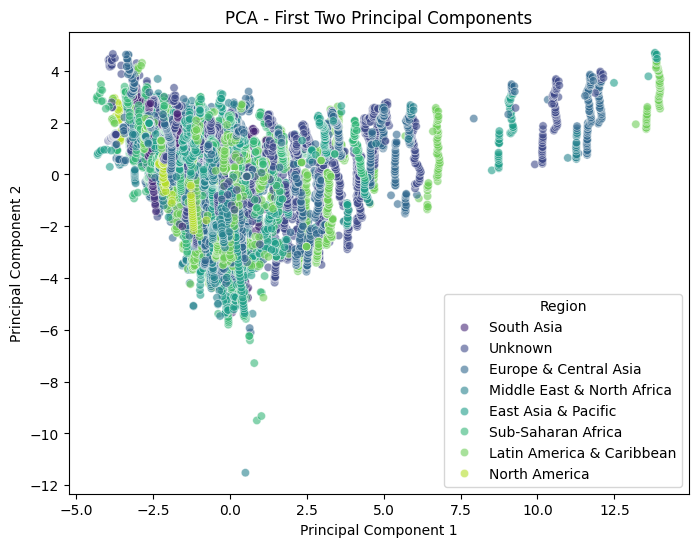

In [75]:
plt.figure(figsize=(8, 6))
sn.scatterplot(x=principal_df['PC1'], y=principal_df['PC2'], hue=merged_World_population['Region'], palette='viridis', alpha=0.6)
# plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.show()


This visualization represents the first two principal components from the PCA applied to the (merged_World_population) dataset, with each data point colored by 'Region'.

This plot gives a high-level view of the differences and similarities between countries across different regions.

There are also significant overlaps globally, possibly due to common socio-economic factors shared across diverse regions.

In [76]:
# Initialize LabelEncoder using the following package: from sklearn.preprocessing import LabelEncoder to
label = LabelEncoder()
# Apply LabelEncoder to each categorical column
categorical_columns = ['country', 'date', 'Country Code', 'Region', 'IncomeGroup']
for col in categorical_columns:
    merged_World_population[col] = label.fit_transform(merged_World_population[col])# print(data.to_string())
merged_World_population.head(10)

,country,date,agricultural_land%,land_area,avg_precipitation,trade_in_services%,population_density,inflation_annual%,military_expenditure%,GDP_current_US,...,life_expectancy_at_birth,population,rural_population,Country Code,Region,IncomeGroup,2020,2021,2022,2023
0,0,0,36.945264,15.440559,7.102517,3.090995,5.685760,3.046663,2.775668,20.102956,...,32.535,15.969882,15.882132,2,5,1,38972230.0,40099462.0,41128771.0,42239854.0
1,0,1,57.878356,13.388154,5.793014,3.090995,2.672565,3.046663,2.775668,20.123407,...,33.068,15.989141,15.898297,2,5,1,38972230.0,40099462.0,41128771.0,42239854.0
2,0,2,57.955016,13.388154,5.793014,3.090995,2.691335,3.046663,2.775668,20.119350,...,33.547,16.009290,15.915243,2,5,1,38972230.0,40099462.0,41128771.0,42239854.0
3,0,3,58.031676,13.388154,5.793014,3.090995,2.710729,3.046663,2.775668,20.437064,...,34.016,16.030080,15.932732,2,5,1,38972230.0,40099462.0,41128771.0,42239854.0
4,0,4,58.116002,13.388154,5.793014,3.090995,2.730717,3.046663,2.775668,20.500122,...,34.494,16.051477,15.950705,2,5,1,38972230.0,40099462.0,41128771.0,42239854.0
5,0,5,58.123668,13.388154,5.793014,3.090995,2.751448,3.046663,2.775668,20.729910,...,34.953,16.073637,15.969342,2,5,1,38972230.0,40099462.0,41128771.0,42239854.0
6,0,6,58.192662,13.388154,5.793014,3.090995,2.772560,3.046663,2.775668,21.059738,...,35.453,16.096172,15.988219,2,5,1,38972230.0,40099462.0,41128771.0,42239854.0
7,0,7,58.229459,13.388154,5.793014,3.090995,2.794068,3.046663,2.775668,21.238084,...,35.924,16.119098,16.007384,2,5,1,38972230.0,40099462.0,41128771.0,42239854.0
8,0,8,58.230992,13.388154,5.793014,3.090995,2.816122,3.046663,2.775668,21.040507,...,36.418,16.142572,16.026959,2,5,1,38972230.0,40099462.0,41128771.0,42239854.0
9,0,9,58.255523,13.388154,5.793014,3.090995,2.838503,3.046663,2.775668,21.066067,...,36.910,16.166361,16.046732,2,5,1,38972230.0,40099462.0,41128771.0,42239854.0


In [85]:
# Split Dataset into Features (X) and Target (y)
X = merged_World_population.drop(columns=['GDP_current_US'])
y = merged_World_population['GDP_current_US']

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# Step 4: Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
# pca = PCA(n_components=5)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)


pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

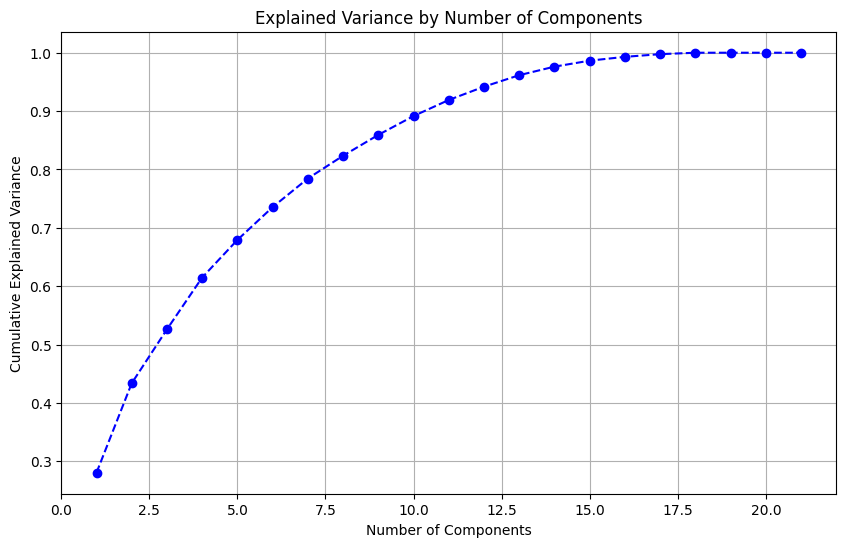

In [87]:
# Visualize Explained Variance to Decide on Number of Components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [109]:
# Step 7: Experiment to Find Optimal Number of Components
explained_variances = []
mse_scores = []
r2_scores = []
components_range = range(1, len(pca.explained_variance_ratio_) + 1)

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train Regression Model on PCA-Reduced Data
    reg_pca = LinearRegression()
    reg_pca.fit(X_train_pca, y_train)
    y_pred_pca = reg_pca.predict(X_test_pca)

    # Evaluate Model on PCA-Reduced Data
    mse = mean_squared_error(y_test, y_pred_pca)
    r2 = r2_score(y_test, y_pred_pca)

    explained_variances.append(np.sum(pca.explained_variance_ratio_))
    mse_scores.append(mse)
    r2_scores.append(r2)

# Step 8: Plot MSE and R^2 Scores to Determine Optimal Number of Components


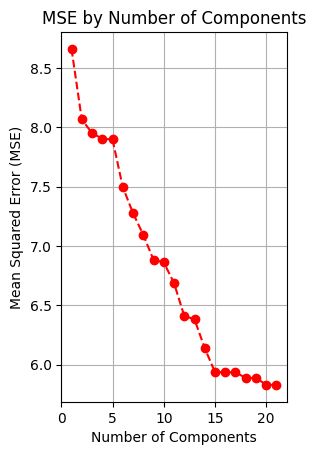

In [108]:
# Plot MSE Scores
plt.subplot(1, 2, 1)
plt.plot(components_range, mse_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE by Number of Components')
plt.grid(True)

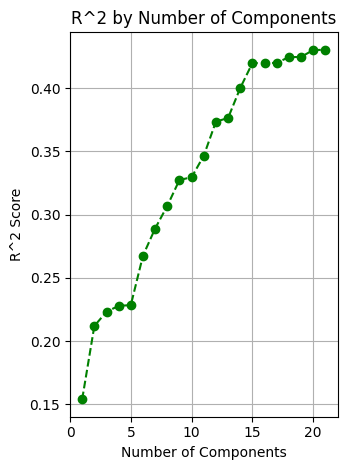

In [91]:
# Plot R^2 Scores
plt.subplot(1, 2, 2)
plt.plot(components_range, r2_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Components')
plt.ylabel('R^2 Score')
plt.title('R^2 by Number of Components')
plt.grid(True)

plt.tight_layout()
plt.show()

In [92]:
# Choose Optimal Number of Components (based on elbow point from plot)
optimal_components = 5  # Adjust based on elbow point analysis
pca = PCA(n_components=optimal_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [93]:
# Train Regression Model on Original Data
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [94]:
# Evaluate Model on Original Data
mse_original = mean_squared_error(y_test, y_pred)
r2_original = r2_score(y_test, y_pred)
print(f"Original Data MSE: {mse_original}, R^2: {r2_original}")

Original Data MSE: 5.829714704287985, R^2: 0.43044069105712746


In [95]:
# Train Regression Model on PCA-Reduced Data
reg_pca = LinearRegression()
reg_pca.fit(X_train_pca, y_train)
y_pred_pca = reg_pca.predict(X_test_pca)

In [96]:
# Step 13: Evaluate Model on PCA-Reduced Data
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)
print(f"PCA-Reduced Data MSE: {mse_pca}, R^2: {r2_pca}")

PCA-Reduced Data MSE: 7.896770510737103, R^2: 0.22849069240598363


# Mean Squared Error (MSE):
# Original Data MSE: 5.8297
# PCA-Reduced Data MSE: 7.8967

# R-squared (R²):
# Original Data R²: 0.4304
# PCA-Reduced Data R²: 0.2284

# The Original Data performed better in terms of both MSE and R² metrics compared to the PCA-Reduced Data.
# This means that the dimensionality reduction through PCA did not improve the performance of the regression model.
# In fact, it led to a degradation in performance for this dataset

# This is likely because PCA reduced the number of features, which can also reduce
# the amount of information available for the model to use. Since GDP is likely influenced
# by a wide variety of factors, the reduction of features led to loss of critical information.

Text(0, 0.5, 'Frequency')

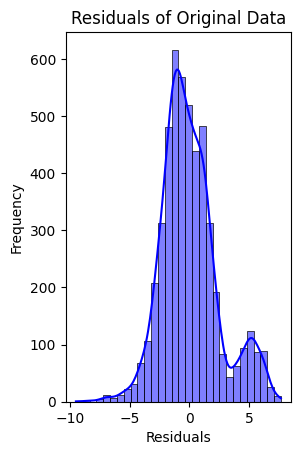

In [99]:
# Residuals for Original Data
plt.subplot(1, 2, 1)
sn.histplot(y_test - y_pred, kde=True, color='blue', bins=30)
plt.title('Residuals of Original Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

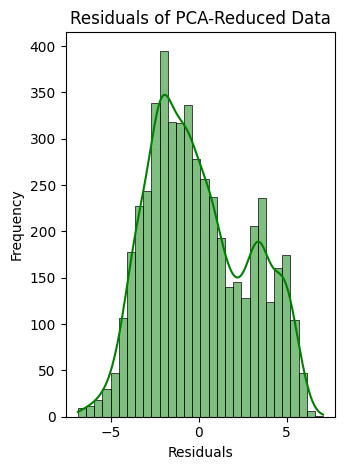

In [101]:
# Residuals for PCA-Reduced Data
plt.subplot(1, 2, 2)
sn.histplot(y_test - y_pred_pca, kde=True, color='green', bins=30)
plt.title('Residuals of PCA-Reduced Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

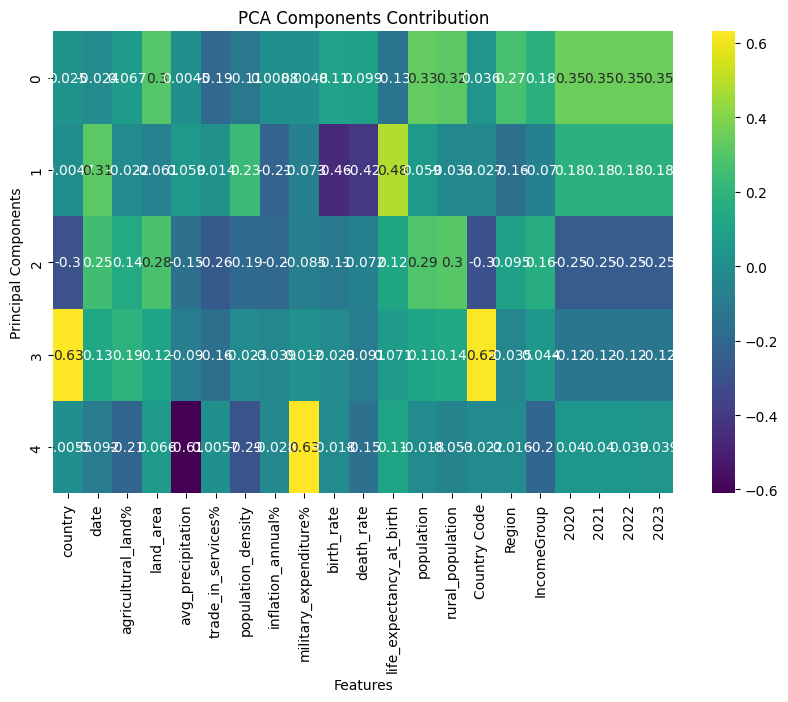

In [105]:
# Visualize PCA Components
plt.figure(figsize=(10, 6))
components = pd.DataFrame(pca.components_, columns=X.columns)
sn.heatmap(components, cmap='viridis', annot=True)
plt.title('PCA Components Contribution')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

In [79]:
# # Train Regression Model on Original Data
# reg = LinearRegression()
# reg.fit(X_train, y_train)
# y_pred = reg.predict(X_test)

# # Step 9: Evaluate Model on Original Data
# mse_original = mean_squared_error(y_test, y_pred)
# r2_original = r2_score(y_test, y_pred)
# print(f"Original Data MSE: {mse_original}, R^2: {r2_original}")

# # Train Regression Model on PCA-Reduced Data
# reg_pca = LinearRegression()
# reg_pca.fit(X_train_pca, y_train)
# y_pred_pca = reg_pca.predict(X_test_pca)


# # Step 11: Evaluate Model on PCA-Reduced Data
# mse_pca = mean_squared_error(y_test, y_pred_pca)
# r2_pca = r2_score(y_test, y_pred_pca)
# print(f"PCA-Reduced Data MSE: {mse_pca}, R^2: {r2_pca}")

# # Step 12: Visualize the Residuals for Both Models
# plt.figure(figsize=(14, 6))

# # Residuals for Original Data
# plt.subplot(1, 2, 1)
# sn.histplot(y_test - y_pred, kde=True, color='blue', bins=30)
# plt.title('Residuals of Original Data')
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')

# # Residuals for PCA-Reduced Data
# plt.subplot(1, 2, 2)
# sn.histplot(y_test - y_pred_pca, kde=True, color='green', bins=30)
# plt.title('Residuals of PCA-Reduced Data')
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()
